In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[9, 7, 5, 7, 7]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

2     0.0261
3     0.0809
4     0.1631
5     0.2752
6     0.4093
7     0.5851
8     0.7236
9     0.8338
10    0.9186
11    0.9738
12    1.0000
Name: count, dtype: float64

<Axes: >

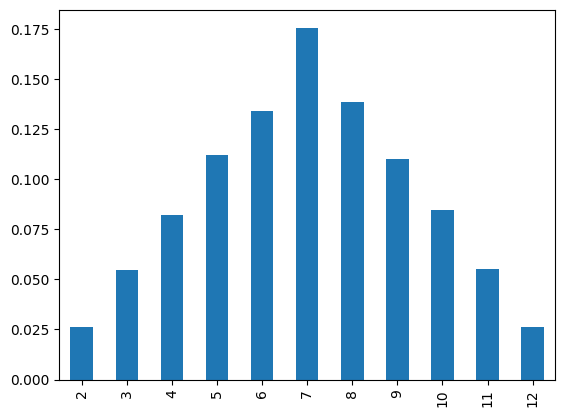

In [8]:
s.plot(kind='bar')

<Axes: >

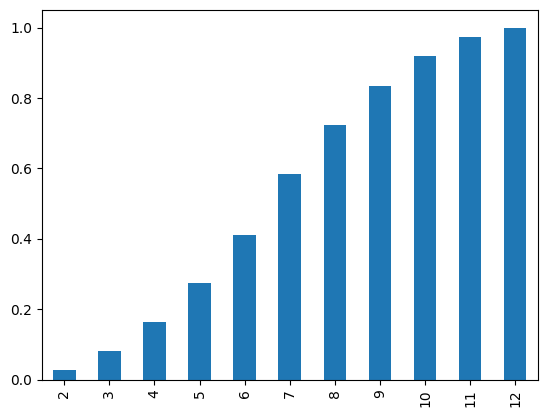

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)
# this will return a sample data 
# from the population normal dist of mu=50 and std=5

In [11]:
sample.mean()

49.93402182896637

(array([ 10.,  18.,  57., 123., 220., 232., 174., 108.,  45.,  13.]),
 array([34.72370885, 37.58054985, 40.43739086, 43.29423186, 46.15107287,
        49.00791388, 51.86475488, 54.72159589, 57.57843689, 60.4352779 ,
        63.2921189 ]),
 <BarContainer object of 10 artists>)

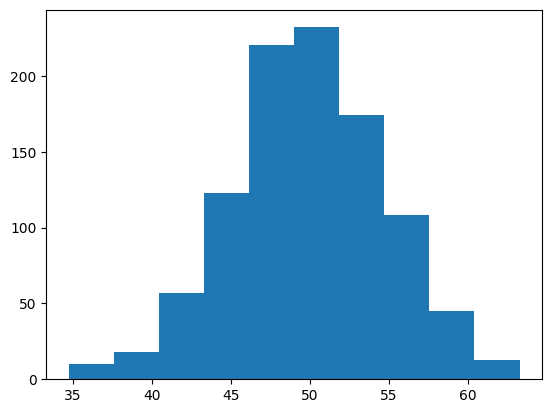

In [12]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [13]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [15]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 3.3 MB/s eta 0:00:0000:0100:01


In [17]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [18]:
values = np.linspace(sample.min(),sample.max(),100)

In [19]:
sample.max()

63.29211890189414

In [20]:
probabilities = [dist.pdf(value) for value in values]

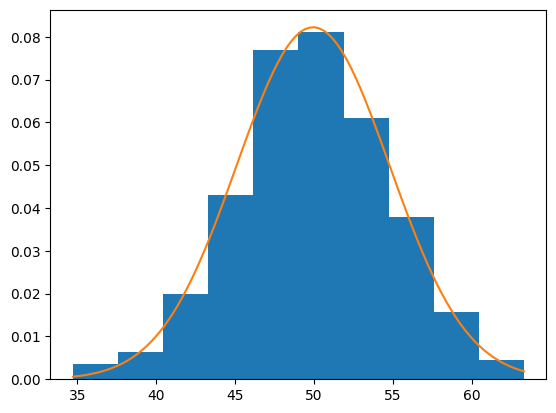

In [21]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

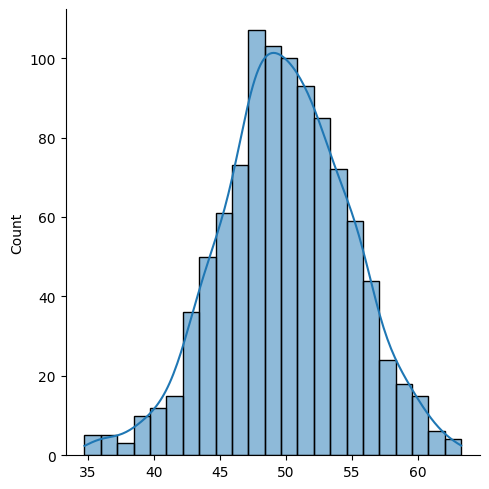

In [25]:
import seaborn as sns
# sns.distplot(sample)
sns.displot(sample,kde=True)

# KDE

In [ ]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [ ]:
sample

array([25.37101508, 23.17282846, 23.19266408, 21.23591442, 19.99585223,
       26.05479481, 24.87635573, 22.5707997 , 24.53847252, 17.19733365,
       15.62925657, 18.86415649, 19.00022272, 18.59746903, 13.39775335,
       14.44637505, 16.50879004, 22.05320241, 16.91522729, 24.87998461,
       25.38985776, 27.60649904, 20.60436429, 20.51424303, 16.82990467,
       16.72124091, 15.82440899, 19.21818665, 22.43898545, 19.05112432,
       21.23007028, 22.35301007, 14.54516627, 13.68508601, 21.93909454,
       16.50490442, 18.52882481, 22.6361671 , 22.06974787, 22.80384678,
       16.02872418, 14.45938868, 19.39410043, 23.67978479, 30.33476097,
       17.75143584, 18.41254234, 22.79632257, 14.69758962, 24.0195535 ,
       19.72296554, 18.34844409, 22.4203516 , 17.6989518 , 23.95721438,
       22.29306234, 13.23571722, 17.7655658 , 26.32972605, 15.46106693,
       21.51581129, 22.84867011, 19.72513232, 24.73696242, 21.79223535,
        8.22274972, 15.86279733, 20.42353259, 25.27510655, 11.79

(array([ 2.,  2.,  0.,  5.,  3.,  1.,  6.,  7., 11., 12., 21., 24., 19.,
        27., 18., 24., 26., 23., 13., 23.,  9.,  8., 11., 12., 16.,  9.,
        19., 14., 21., 46., 29., 42., 46., 65., 54., 75., 48., 50., 45.,
        32., 26., 20., 13.,  8.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 5.05186622,  6.07863826,  7.1054103 ,  8.13218234,  9.15895438,
        10.18572641, 11.21249845, 12.23927049, 13.26604253, 14.29281457,
        15.31958661, 16.34635865, 17.37313068, 18.39990272, 19.42667476,
        20.4534468 , 21.48021884, 22.50699088, 23.53376291, 24.56053495,
        25.58730699, 26.61407903, 27.64085107, 28.66762311, 29.69439514,
        30.72116718, 31.74793922, 32.77471126, 33.8014833 , 34.82825534,
        35.85502737, 36.88179941, 37.90857145, 38.93534349, 39.96211553,
        40.98888757, 42.0156596 , 43.04243164, 44.06920368, 45.09597572,
        46.12274776, 47.1495198 , 48.17629184, 49.20306387, 50.22983591,
        51.25660795, 52.28337999, 53.31015203, 54.33692407,

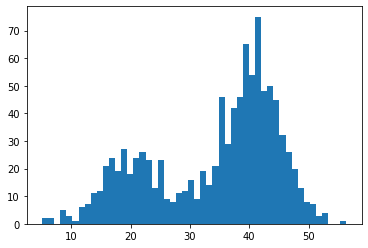

In [ ]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [ ]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [ ]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

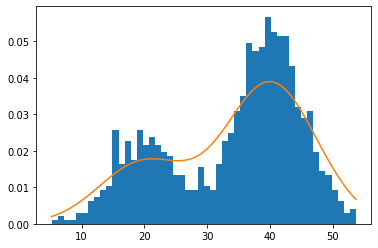

In [ ]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<AxesSubplot:ylabel='Density'>

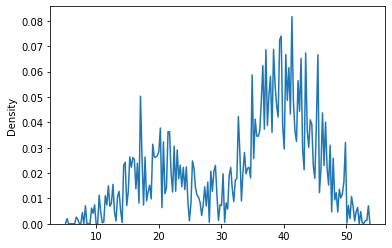

In [ ]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

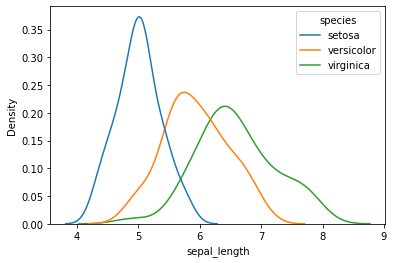

In [ ]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

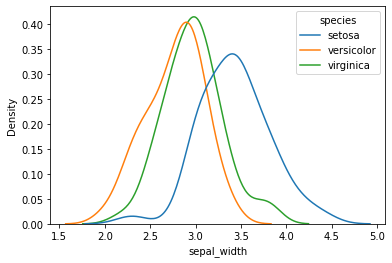

In [ ]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

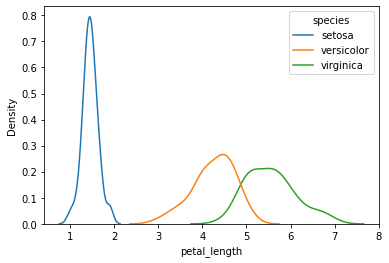

In [ ]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

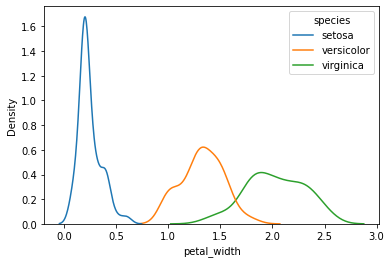

In [ ]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

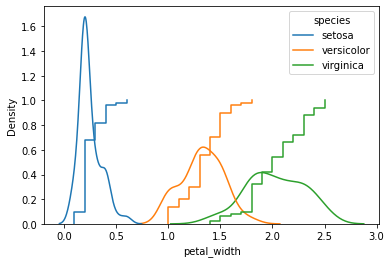

In [ ]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

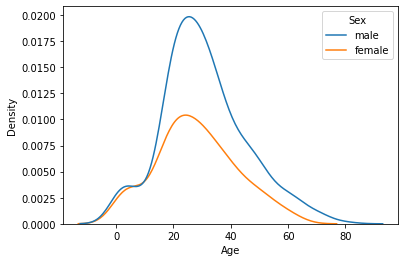

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

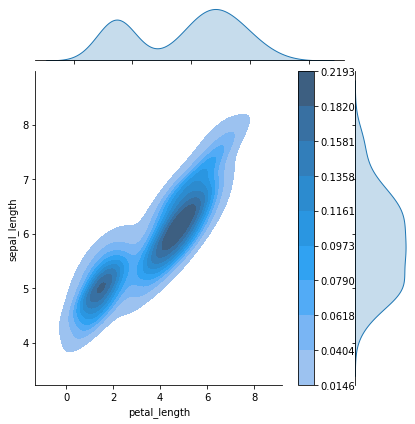

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

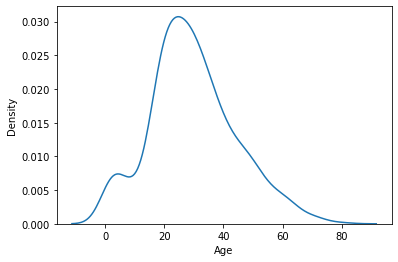

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

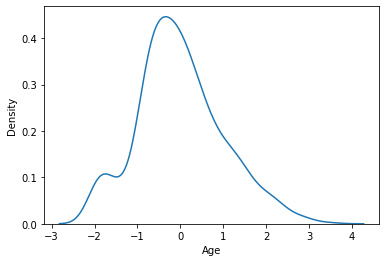

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

2.338621049070358e-16

In [ ]:
x.std()

1.0

In [ ]:
titanic['Age'].skew()

0.38910778230082704

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [ ]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
titanic['Age'].max()

80.0